# Making Sense of 4 National Rates: 
# Mortgage, Inflation, Interest, and Unemployment 

In [2]:
import pandas as pd
import plotly
%matplotlib inline

In [3]:
# load dataset
pd.set_option('display.max_rows', 2)
rates = pd.read_csv('rates.csv')
rates = rates.set_index('DATE')

In [4]:
# plot dataset
plotly.offline.init_notebook_mode(connected=True)
mortgage = {'type': 'scatter', 'x': rates.index.tolist(), 'y': rates['MORTGAGE'].tolist(), 'name':'mortgage'}
inflation = {'type': 'scatter', 'x': rates.index.tolist(), 'y': rates['INFLATION'].tolist(), 'name':'inflation'}
interest = {'type': 'scatter', 'x': rates.index.tolist(), 'y': rates['INTEREST'].tolist(), 'name':'interest'}
unemployment = {'type': 'scatter', 'x': rates.index.tolist(), 'y': rates['UNEMPLOYMENT'].tolist(), 'name':'unemployment'}

# rates_plot = plotly.offline.iplot([mortgage, inflation, interest, unemployment])

In [5]:
# ![time_series](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/time_series_plot.png)

## PURPOSE

My goal for this bootcamp is to apply data science to a topic related to finance.  I figure it would be interesting to also learn more about economics along the way.  The challenge is I do not have domain knowledge on these topics, but that is also part of the journey!  I originally looked at the 30yr US Mortgage rate for an earlier summary statistics assignment, and I learned that it has historically been influenced by inflation.  So I wanted to look at other economic indicators and explore some underlying relationships.

## THE DATASET

The time series above is from two datasets collected and analyzed for this capstone project.  These two datasets have been cleaned up and merged [see Appendix I] to focus on four US economic indicators: mortgage rate, inflation rate, interest rate, and unemployment rate.  The rates analyzed are observed from 1971-2016 on a monthly basis.  The range of dates is chosen to make both sets compatible for merging while also removing null entries.  It is assumed that there is no bias in the data given its very objective subject.  The first source (30yr mortgage rate) is directly from Fred Economic Data, [link here](https://fred.stlouisfed.org/series/MORTGAGE30US).  The second source (including interest rate, unemployment rate, and inflation rate) is from Kaggle, [link here](
https://www.kaggle.com/federalreserve/interest-rates/version/1).  Important years corresponding to financial crisis in the US are: early and mid 1980's, 1990, 2000, and 2007

In [4]:
rates

,INTEREST,UNEMPLOYMENT,INFLATION,MORTGAGE
DATE,,,,
1971-04-01,4.15,5.9,5.0,7.310
...,...,...,...,...
2016-12-01,0.54,4.7,2.2,4.198


In [5]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 1971-04-01 to 2016-12-01
Data columns (total 4 columns):
INTEREST        549 non-null float64
UNEMPLOYMENT    549 non-null float64
INFLATION       549 non-null float64
MORTGAGE        549 non-null float64
dtypes: float64(4)
memory usage: 21.4+ KB


## METRICS

From the QQ plots below, using a normally distributed set, each of the four rates follow a rough line that would indicate the rates are somewhat normally distributed.  Assuming this distribution, the mean and standard deviation can be used to describe the different rates.

Keep in mind that these summaries are limited since the date only ranges between 1971-2016.

### Mortgage Rate

This is specifically looking at the 30-year fixed rate mortgage.  Mortgage rates affect the real estate market, which further influences the US economy.  Lower mortgage rates can make the net cost of homeownership more affordable to more people.  However, it can also be said that the increase in affordability introduces more competing buyers that lead to increase in sale price.  Current homeowners benefit from lower mortgage rates through increase in home equity and additional cash flow after refinancing their homes.  The historic peak of the 80s highlights the interesting relationship of mortgage rate with the other rates in this report.    

The average of 8.25% is skewed by the large rates from the 80s Recession with max rate of 18.45%.  Right before 2007, the mortgage rates are just under 7%.  Latest rates are low, at 3.64%.     

{mean: 8.25, median: 7.8, min: 3.35, max: 18.45}
![mortgage](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/variable_analysis_MORTGAGE.png)

### Inflation Rate

Inflation rate is based on the Consumer Price Index (CPI) provided by the Bureau of Labor Statistics.  It does not include food and energy, which are too volatile and risk misrepresentation of general inflation.  It reflects the change in prices of common goods that affect a majority of the population.  Inflation is part of the equation in explaining the buying power of consumers.  Higher inflation requires higher salaries if individuals are to keep pace with their increasing expenses.  The Federal Reserve is mainly concerned with maintaining a healthy level of inflation at 2%.  This level is high enough to keep consumer demand steady, and the economy running, without being too high to price out most consumers, and spell doom on the economy!           

Historically, the average inflation rate of 4% is twice the target rate set by Federal Reserve.  This is also skewed by the large inflation in the 80s Recession.  The 2% target inflation is within 1 standard deviation.  From the timeseries above, inflation is more stable and has been adjusting closer to the 2% target.  This suggests that the Federal Reserve is more capable of influencing inflation through effective new monetary policies.    

{mean: 4.02, median: 3.0, min: 0.6, max: 13.6}
![inflation](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/variable_analysis_INFLATION.png)

### Interest Rate

This particular interest rate is the Effective Federal Funds Rate.  This rate is different from the other rates because it is more directly influenced by the Federal Reserve.  Banks are required to leave a percentage of their total accounts as reserve so they can run daily operations.  This is the interest rate on loans that banks offer each other for meeting reserve quotas.  Technically not set, the Federal Reserve has a target rate and monetary policies that lead the market towards that target rate.  The target rate is intended to achieve 2% inflation, as stated in the inflation rate above, and other desirable economic conditions (ie low unemployment and stable economy).  Much like inflation, lower interest rate encourages more consumption.  In this case it is more consumption of credit; credit used to buy actual commoditiesor assets not readily availble otherwise.

QQ plot shows a large concentration of rates near 0, reflecting more of the current situation with Federal Reserve setting low rates in a delicate balance to stimulate the economy post-2008 Great Recession while managing healthy inflation rate.  The median and mean around 5 seems normal at first glance considering this was the interest rate right before the collapse of the housing market.  However, this average also highlights the divide of interest rate pre and post early 90s.  Before early 90s show most interest rates above 5%, and after early 90s show rates below the average.     

{mean: 5.35, median: 5.25, min: 0.07, max: 19.1}
![interest](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/variable_analysis_INTEREST.png)

### Unemployment Rate

The unemployment rate provided by the Bureau of Labor Statistics.  It is calculated from number of unemployed divided by total number of labor force.  The rate used here is not the real unemployment rate, which is much higher.  Unemployment rate is a good confirmation of the economic condition since it trails behind major events.  A drastic rise in unemployment is observed a couple years after historic financial crisis, and a more easing back down to normal rates once employers are confident again in the economy.    

From the time-series plot above, the unemployment rate has the most visible cyclicality with values peaking around 10% and bottom around 4%.  Indeed, the summary stas and histogram below confirms this.

{mean: 6.38, median: 6.0, min: 3.8, max: 10.8}
![unemployment](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/variable_analysis_UNEMPLOYMENT.png)

## TOOLS

![tools1](https://moriohcdn.b-cdn.net/3c9974b51b.png)

## DATA INSIGHTS
![heatmap](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/heatmap.png)

**Question 1:** From plotting the 30yr US Mortgage rate, the all time high of +18% is said to be in response to the high inflation rate at the time (1980s recession). Is there a correlation between mortgage rate and inflation rate after the early 1980s Recession? I'm looking after November of 1982 when the financial crisis is said to have ended.  

In [6]:
correlation_inflation_mortgage = rates.corr().loc['INFLATION','MORTGAGE']
print(f'The correlation between inflation and mortgage rates 1971-2016: {correlation_inflation_mortgage: .2}')
correlation_post1980_inflation_mortgage = rates.loc['1982-12-01':].corr().loc['INFLATION','MORTGAGE']
print(f'The correlation between inflation and mortgage rates after November 1982 is: {correlation_post1980_inflation_mortgage: .2}')
correlation_pre1980_inflation_mortgage = rates.loc[:'1982-12-01'].corr().loc['INFLATION','MORTGAGE']
print(f'The correlation between inflation and mortgage rates before November 1982 is: {correlation_pre1980_inflation_mortgage: .2}')

The correlation between inflation and mortgage rates 1971-2016:  0.74
The correlation between inflation and mortgage rates after November 1982 is:  0.85
The correlation between inflation and mortgage rates before November 1982 is:  0.65


Based on the November 1982 split (pre- and post- 1980s Recession), the correlation between mortgage rate and inflation has only strengthened after the economic downturn.  This could be a result of the government having a better understanding of these economic indicators and developing new monetary policies to influence the movement of mortgage rates.   

**Question 2:** The federal funds rate (interest rate) is reactive and manually set by the government.  With economic health as a big concern, we can expect it to respond to the behavior of inflation.  What behaviors are observed between the two rates based on the data?

In [7]:
correlation_interest_inflation = rates.corr().loc['INTEREST','INFLATION']
print(f'The correlation between interest rate and inflation is: {correlation_interest_inflation: .2}')
correlation_interest_inflation_80 = rates.loc['1981-06-01':'1982-12-01'].corr().loc['INTEREST','INFLATION']
print(f'The correlation between interest and inflation rates during 1980s Recession: {correlation_interest_inflation_80: .2}')
correlation_interest_inflation_90 = rates.loc['1988-01-01':'1992-12-01'].corr().loc['INTEREST','INFLATION']
print(f'The correlation between interest and inflation rates during 1990s Recession: {correlation_interest_inflation_90: .2}')
correlation_interest_inflation_00 = rates.loc['2001-01-01':'2004-06-01'].corr().loc['INTEREST','INFLATION']
print(f'The correlation between interest and inflation rates during 2000s Recession and Dot Com Bubble: {correlation_interest_inflation_00: .2}')
correlation_interest_inflation_08 = rates.loc['2008-01-01':'2009-06-01'].corr().loc['INTEREST','INFLATION']
print(f'The correlation between interest and inflation rates during 2008 Great Recession: {correlation_interest_inflation_08: .2}')

The correlation between interest rate and inflation is:  0.78
The correlation between interest and inflation rates during 1980s Recession:  0.85
The correlation between interest and inflation rates during 1990s Recession:  0.59
The correlation between interest and inflation rates during 2000s Recession and Dot Com Bubble:  0.69
The correlation between interest and inflation rates during 2008 Great Recession:  0.88


This shows more causation than correlation given that we have more control on one of the rates.  This is to confirm if we can effectively curb inflation. it is interesting that 90s and 00s correlation are lower than average correlation, where as 80s and 08 Great Recession show stronger correlation.  It reflects the Federal Reserve having a tighter control during the larger financial crisis.  

**Question 3:** Compare interest rates cut and interest rates increase.  There is a belief that when Feds lower the interest rate, an increase will take a long time. 

In [8]:
delta_interest_rate = pd.Series([])

In [9]:
for delta in rates['INTEREST'].diff():
    if delta > 0:
        delta = "positive"
    elif delta < 0:
        delta = "negative"
    else:
        delta = None
    delta_interest_rate = delta_interest_rate.append(pd.Series([delta]), ignore_index=True)

In [10]:
delta_interest_rate.value_counts()

positive    273
negative    227
dtype: int64

Hm...this shows that there were more instances of rate increase than decrease.  Let's look at the histogram and try to get more information.

min: -6.6, max:  3.1


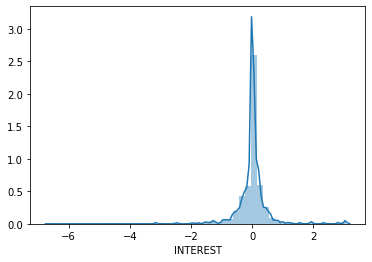

In [11]:
import seaborn as sns
interest_change = rates['INTEREST'].diff().reset_index(drop=True)
sns.distplot(interest_change[1:]);
print(f'min: {interest_change.min(): 0.2}, max: {interest_change.max(): 0.2}')

Although our previous findings show more positive changes with interest rate, this histogram shows that there are larger magnitudes of drop.  

In [12]:
import math

for delta in rates['INTEREST'].diff():
    if delta > 0 or delta < 0:
        delta = round(math.ceil(delta/0.1) * 0.1,2)
        if delta != 0:
            delta_interest_rate = delta_interest_rate.append(pd.Series([delta]), ignore_index=True)

pd.set_option('display.max_rows', None)
delta_interest_rate.value_counts().head(20)

positive    273
negative    227
0.1         131
0.2          43
0.3          40
-0.2         34
-0.1         30
-0.3         15
0.5          15
0.4          13
-0.4         12
-0.5         12
0.6           8
-0.6          6
0.7           5
-0.9          4
-0.7          4
3.1           3
-1.2          3
0.9           3
dtype: int64

In [13]:
df = rates['INTEREST'].diff()

# plot dataset
plotly.offline.init_notebook_mode(connected=True)
interest_delta = {'type': 'bar', 'x': df.index.tolist(), 'y': df.tolist()}

# interest_delta_plot = plotly.offline.iplot([interest_delta])

![rate_change](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/rate_change.png)

## FUTURE MODELING

Using OLS and time-series, can we predict change in one variable based on the changes from another variable? Why is it important?

Lower interest rate is meant to stimulate the economy by making it cheaper for the population to consume debt.  Higher interest rate is used to contract the market when growth has become unsustainable.  Currently we have market indeces that more than tripled from pre-Great Recession levels with focus on meeting target inflation rates.  What could this new environment mean for the future of the markets?  What outcomes can be expected depending on the interest rates set by the Federal Reserve; such as changes in mortgage, inflation, and unemployment?

## APPENDIX

### I. Notebooks
- [cleanup of mortgage data](https://github.com/cnarrieta18/Thinkful/blob/master/Capstone_1/cleaning_mortgage.ipynb)
- [cleanup of federal data](https://github.com/cnarrieta18/Thinkful/blob/master/Capstone_1/cleaning_federal.ipynb)
- [data visualization](https://github.com/cnarrieta18/Thinkful/blob/master/Capstone_1/data_visualization.ipynb)

### II. Functions

~~~~
def summary_stat_plot(plt, array, num_bins=20):
    
    # Plot a histogram.
    sns.distplot(array)
    
    # Add a vertical line at the mean.
    plt.axvline(array.mean(), 
                color='b', 
                linestyle='solid', 
                linewidth=2, 
                label=f'mean: {round(array.mean(),2)}')

    # Add a vertical line at one standard deviation above the mean.
    plt.axvline(array.mean() + array.std(), 
                color='b', 
                linestyle='dashed', 
                linewidth=2, 
                label=f'±std: {round(array.std(),2)}')

    # Add a vertical line at one standard deviation below the mean.
    plt.axvline(array.mean() - array.std(), color='b', linestyle='dashed', linewidth=2)
    
    # Add legend with mean and std
    plt.legend(shadow=True,loc=0)
    
    plt.title('US {} RATE DISTRIBUTION'.format(array.name))
    plt.xlabel('{} RATE'.format(array.name))
    plt.ylabel('FREQEUNCY');
    
    return plt


def qq_plot(plt, series, distribution='normal'):
    
    # Making two variables.
    rand1 = np.random.normal(0, 1, len(series))
    rand2 = np.random.gamma(5,1, len(series))

    # Sorting the values in ascending order.
    unknown_dist = series.sort_values()
    unknown_dist_mean = unknown_dist.mean()
    unknown_dist_std = unknown_dist.std()
    unknown_dist_norm = (unknown_dist - unknown_dist_mean) / unknown_dist_std
    rand1.sort()
    rand2.sort()
    
    # Plotting the variable against series.    
    if distribution == 'normal':
        plt.title('QQ Plot - Normal Distribution')
        plt.plot(unknown_dist, rand1, "o")
    elif distribution == 'gamma':
        plt.title('QQ Plot - Gamma Distribution')
        plt.plot(unknown_dist, rand2, "o")
    
    return plt


def combine_plots(series):

    plt.figure(figsize = [10,5])

    # histogram
    plt.subplot(1,2,1)
    fig = summary_stat_plot(plt, series)

    # qq plot
    plt.subplot(1,2,2)
    fig2 = qq_plot(fig, series)

    fig2.savefig('Images/variable_analysis_{}.png'.format(series.name));

~~~~

### III. Additional Plots

![boxplot1](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/boxplot_MORTGAGE.png)
![boxplot2](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/boxplot_INFLATION.png)
![boxplot3](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/boxplot_UNEMPLOYMENT.png)
![boxplot4](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/boxplot_INTEREST.png)

![pairplot](https://raw.githubusercontent.com/cnarrieta18/Thinkful/master/Capstone_1/Images/pairplot.png)

### IV. Additional Resources

On understanding interest rate:
 - https://www.thebalance.com/what-is-interest-315436

On reviewing historical financial crisis in the US:
 - https://en.wikipedia.org/wiki/List_of_economic_crises#20th_century
 - https://www.ifre.com/story/1291951/a-history-of-the-past-40-years-in-financial-crises-0dxjlzsrcx

### V. Rates Dataset

In [14]:
pd.set_option('display.max_rows', None)
rates

,INTEREST,UNEMPLOYMENT,INFLATION,MORTGAGE
DATE,,,,
1971-04-01,4.15,5.9,5.0,7.3100
1971-05-01,4.63,5.9,5.2,7.4250
1971-06-01,4.91,5.9,4.9,7.5300
1971-07-01,5.31,6.0,4.9,7.6040
1971-08-01,5.56,6.1,4.6,7.6975
1971-09-01,5.55,6.0,4.4,7.6875
1971-10-01,5.20,5.8,3.8,7.6280
1971-11-01,4.91,6.0,3.3,7.5500
1971-12-01,4.14,6.0,3.1,7.4800
